In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("~/downloads/leba.csv")

# Rename columns
oldcols = [
    "slypos_leba_16", "slypos_leba_17", "slypos_leba_38", "slypos_leba_08", "slypos_leba_09", "slypos_leba_10",
    "slypos_leba_11", "slypos_leba_12", "slypos_leba_07", "slypos_leba_27", "slypos_leba_03", "slypos_leba_42",
    "slypos_leba_30", "slypos_leba_43", "slypos_leba_32", "slypos_leba_37", "slypos_leba_40", "slypos_leba_33",
    "slypos_leba_48", "slypos_leba_47", "slypos_leba_25", "slypos_leba_04", "slypos_leba_01"
]
newcols = [
    "S01", "S02", "S03", "S04", "S05", "S06", "S07", "S08", "S09", "S10", "S11", "S12",
    "S13", "S14", "S15", "S16", "S17", "S18", "S19", "S20", "S21", "S22", "S23"
]
data.rename(columns=dict(zip(oldcols, newcols)), inplace=True)

# Create new factor columns
data["F1"] = data[["S01", "S02", "S03"]].sum(axis=1)
data["F2"] = data[["S04", "S05", "S06", "S07", "S08", "S09"]].sum(axis=1)
data["F3"] = data[["S10", "S11", "S12", "S13", "S14"]].sum(axis=1)
data["F4"] = data[["S15", "S16", "S17", "S18"]].sum(axis=1)
data["F5"] = data[["S19", "S20", "S21", "S22", "S23"]].sum(axis=1)

# Prepare graph data
graph_data = data[[
    "slypos_demographics_age", "F2", "F3", "F5"
]].copy()
graph_data.rename(columns={
    "F2": "Spending time outdoors",
    "F3": "Using phone and smartwatch in bed",
    "F5": "Using light in the morning and during daytime",
    "slypos_demographics_age": "age"
}, inplace=True)

# Melt data for plotting
graph_data_melted = graph_data.melt(id_vars="age", var_name="variable", value_name="value")

graph_data_melted

,age,variable,value
0,25,Spending time outdoors,17
1,20,Spending time outdoors,18
2,22,Spending time outdoors,15
3,25,Spending time outdoors,18
4,24,Spending time outdoors,11
...,...,...,...
2065,26,Using light in the morning and during daytime,10
2066,35,Using light in the morning and during daytime,6
2067,25,Using light in the morning and during daytime,8
2068,38,Using light in the morning and during daytime,11


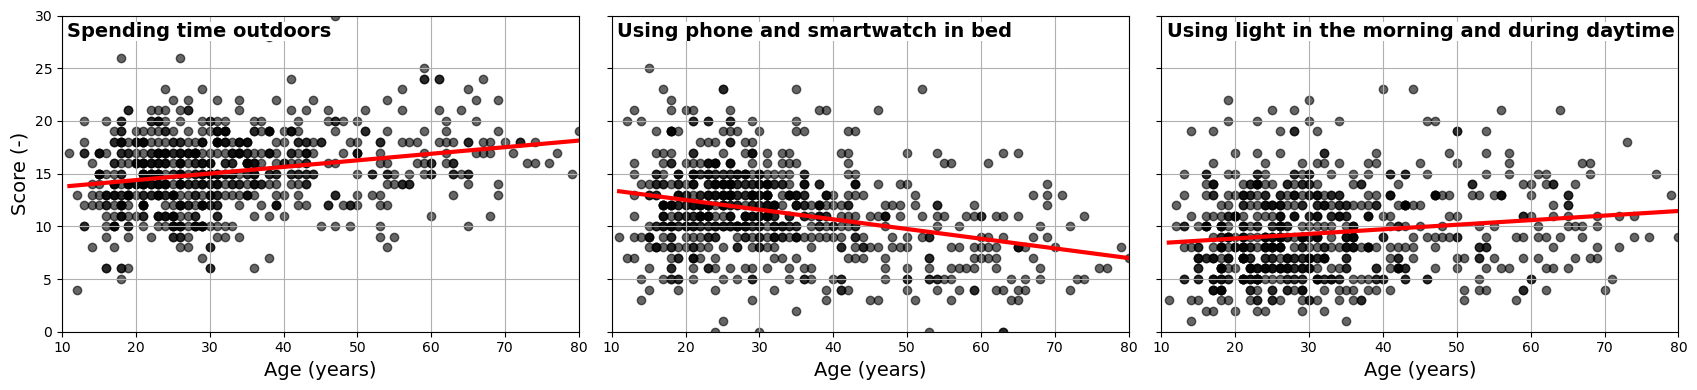

In [61]:
from sklearn.linear_model import LinearRegression

variables = graph_data_melted['variable'].unique()
fig, axes = plt.subplots(1, len(variables), figsize=(6 * len(variables), 4), sharey=True)

for i, (ax, var) in enumerate(zip(axes, variables)):
    subset = graph_data_melted[graph_data_melted['variable'] == var]
    # Jitter age values for better visualization
    # jittered_age = subset['age'] + np.random.normal(0, 0.5, size=len(subset))
    ax.scatter(subset['age'], subset['value'], alpha=0.6, color='black')
    
    # Fit and plot linear regression
    X = subset['age'].values.reshape(-1, 1)
    y = subset['value'].values
    model = LinearRegression().fit(X, y)
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    ax.plot(x_range, y_pred, color='red', linewidth=3)
    ax.set_xlim(10,80)
    ax.set_ylim(0,30)
    # ax.set_title(var)
    ax.set_xlabel("Age (years)", fontsize=14)
    if i == 0:
        ax.set_ylabel("Score (-)", fontsize=14)
    else:
        ax.set_ylabel("")
    ax.grid(True)

    ax.text(
        0.01, 0.98, var,
        transform=ax.transAxes,
        fontsize=14,
        fontweight='bold',
        va='top',
        ha='left',
        bbox=dict(facecolor='white', alpha=1, edgecolor='none', pad=0.2)
    )
plt.tight_layout()
plt.show()

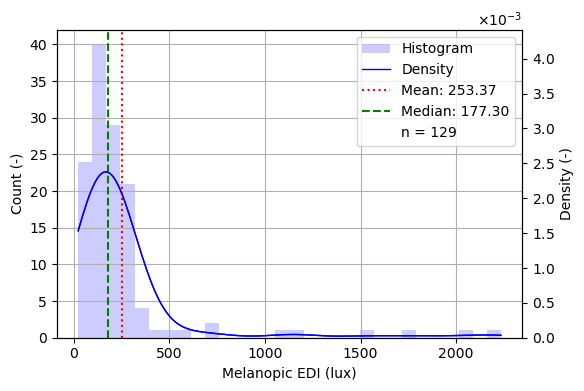

In [50]:
# histogram/density curve of mEDI_[lux]
# median or mean vertical lines
# indicate the number of data points on the plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

data = pd.read_excel("~/downloads/classroom.xlsx", sheet_name="Main")
x = data["mEDI_[lux]"].dropna()

mean = x.mean()
median = x.median()

plt.figure(figsize=(6, 4))

ax = plt.gca()
ax2 = ax.twinx()

counts, bins, _ = ax.hist(x, bins=30, alpha=0.2, color='blue', label='Histogram')

density = gaussian_kde(x)
x_vals = np.linspace(x.min(), x.max(), 200)
bin_width = bins[1] - bins[0]
scaled_density = density(x_vals) * len(x) * bin_width

ax.plot(x_vals, scaled_density, color='blue', label='Density', linewidth=1)

ax2.plot(x_vals, density(x_vals), color='blue', label='Non-Scaled Density', linewidth=1)

ymin, ymax = ax.get_ylim()
density_min = 0
density_max = ymax / (len(x) * bin_width)
ax2.set_ylim(density_min, density_max)

ax.axvline(mean, color='red', linestyle=':', label=f'Mean: {mean:.2f}')
ax.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')

from matplotlib.lines import Line2D
handles, labels = ax.get_legend_handles_labels()
handles.append(Line2D([0], [0], color='none', label=f'n = {len(x)}'))
ax.legend(handles, labels + [f'n = {len(x)}'])

ax.set_xlabel('Melanopic EDI (lux)')
ax.set_ylabel('Count (-)')

from matplotlib.ticker import ScalarFormatter

ax2.set_ylabel('Density (-)')
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.grid()
plt.show()

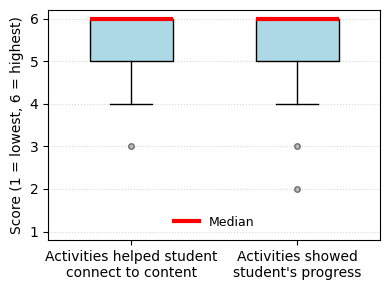

[0     5.0
 1     5.0
 2     6.0
 3     6.0
 4     6.0
 5     5.0
 6     6.0
 7     5.0
 8     3.0
 9     6.0
 10    6.0
 11    6.0
 12    4.0
 13    6.0
 Name: Course learning activities helped me connect to the content., dtype: float64,
 0     6.0
 1     5.0
 2     6.0
 3     6.0
 4     6.0
 5     5.0
 6     5.0
 7     4.0
 8     2.0
 9     6.0
 10    6.0
 11    6.0
 12    3.0
 13    6.0
 Name: Course activities gave me the chance to show my progress towards course learning outcomes., dtype: float64]

In [34]:
# plot columns AJ and AL as boxplots, same style as before, must be small and self-explanatory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import gaussian_kde

data = pd.read_excel("~/downloads/ExperientialActivitiesEvaluation.xlsx", sheet_name=0)

cols = [data.columns[35], data.columns[37]]
box_data = data[cols].dropna()

# Plot
plt.figure(figsize=(4, 3))
box = plt.boxplot([box_data[cols[0]], box_data[cols[1]]],
                  patch_artist=True,
                  widths=0.5,
                  boxprops=dict(facecolor='lightblue', color='black'),
                  medianprops=dict(color='red', linewidth=3,linestyle='-'),
                  whiskerprops=dict(color='black'),
                  capprops=dict(color='black'),
                  flierprops=dict(marker='o', markerfacecolor='gray', markersize=4, linestyle='none', alpha=0.5)
                 )

short_labels = [
    "Activities helped student\nconnect to content",
    "Activities showed\nstudent's progress"
]
plt.xticks([1, 2], short_labels, fontsize=10)
plt.ylabel('Score (1 = lowest, 6 = highest)', fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.ylim(0.8, 6.2)

from matplotlib.lines import Line2D
median_legend = Line2D([0], [0], color='red', linewidth=3, linestyle='-',label='Median')
plt.legend(handles=[median_legend], loc='lower center', fontsize=9, frameon=False)

plt.tight_layout()
plt.show()

[box_data[cols[0]], box_data[cols[1]]]

/var/folders/jp/0vb4wj0d5n98r8nbl1vhmw2c0000gp/T/ipykernel_60614/4128042659.py:24: RuntimeWarning: invalid value encountered in power
  return (a - d) / (1 + (x / b) ** c) + d


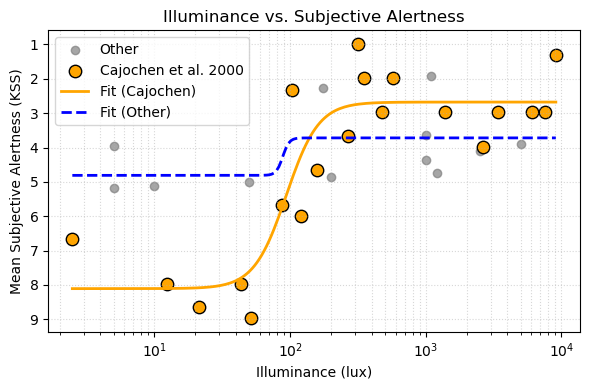

Fitted parameters Cajochen [a, b, c, d]: [ 8.10713152 93.6398737   3.6461845   2.67650769]
Fitted parameters All [a, b, c, d]: [ 4.81000573 88.24739766 18.19736077  3.71925088]


In [47]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

# Load data
data = pd.read_excel("~/downloads/mean-subj-alertness.xlsx", sheet_name=0)

x_all = data["illuminance_lux"].values
y_all = data["mean_subjective_alertness"].values

# Cajochen points
is_cajochen = data["Reference"] == "Cajochen et al. 2000"
x_caj = data.loc[is_cajochen, "illuminance_lux"].values
y_caj = data.loc[is_cajochen, "mean_subjective_alertness"].values

# All points except Cajochen
not_cajochen = ~is_cajochen
x_other = data.loc[not_cajochen, "illuminance_lux"].values
y_other = data.loc[not_cajochen, "mean_subjective_alertness"].values

# Define the function
def log_func(x, a, b, c, d):
    return (a - d) / (1 + (x / b) ** c) + d

# Fit for Cajochen
p0_caj = [max(y_caj), np.median(x_caj), 1, min(y_caj)]
params_caj, _ = curve_fit(log_func, x_caj, y_caj, p0=p0_caj, maxfev=10000)

# Fit for all points except Cajochen
p0_other = [max(y_other), np.median(x_other), 1, min(y_other)]
params_other, _ = curve_fit(log_func, x_other, y_other, p0=p0_other, maxfev=100000)

# Plot data and fits
plt.figure(figsize=(6, 4))
plt.scatter(
    x_other, y_other,
    color="gray", alpha=0.7, label="Other"
)
plt.scatter(
    x_caj, y_caj,
    color="orange", edgecolor="black", s=80, label="Cajochen et al. 2000"
)

# Plot fitted curves
x_fit = np.logspace(np.log10(x_all.min()), np.log10(x_all.max()), 200)
y_fit_caj = log_func(x_fit, *params_caj)
y_fit_all = log_func(x_fit, *params_other)
plt.plot(x_fit, y_fit_caj, color="orange", linewidth=2, label="Fit (Cajochen)")
plt.plot(x_fit, y_fit_all, color="blue", linewidth=2, linestyle="--", label="Fit (Other)")

plt.xscale("log")
plt.xlabel("Illuminance (lux)")
plt.ylabel("Mean Subjective Alertness (KSS)")
plt.title("Illuminance vs. Subjective Alertness")
plt.legend()
plt.grid(True, which="both", ls=":", alpha=0.5)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

print("Fitted parameters Cajochen [a, b, c, d]:", params_caj)
print("Fitted parameters All [a, b, c, d]:", params_other)

/var/folders/jp/0vb4wj0d5n98r8nbl1vhmw2c0000gp/T/ipykernel_60614/297027409.py:26: RuntimeWarning: invalid value encountered in power
  return (a - d) / (1 + (x / b) ** c) + d


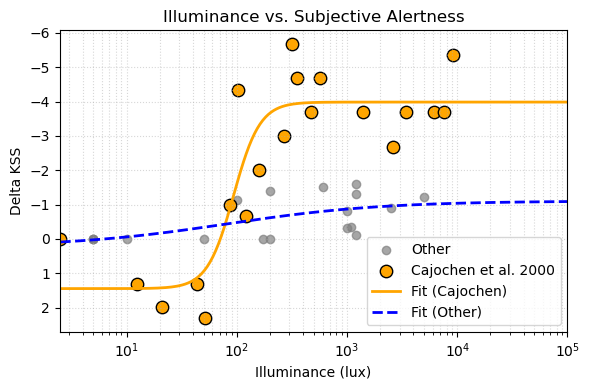

Fitted parameters Cajochen [a, b, c, d]: [ 1.44554492 93.6398758   3.64618471 -3.98507885]
Fitted parameters All [a, b, c, d]: [ 0.23136977 80.7555492   0.61349576 -1.10583298]


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

# Load data
data = pd.read_excel("~/downloads/mean-subj-alertness.xlsx", sheet_name=0)

max_x = 100000

x_all = data["illuminance_lux"].values
y_all = data["delta_kss"].values

# Cajochen points
is_cajochen = data["Reference"] == "Cajochen et al. 2000"
x_caj = data.loc[is_cajochen, "illuminance_lux"].values
y_caj = data.loc[is_cajochen, "delta_kss"].values

# All points except Cajochen
not_cajochen = ~is_cajochen
x_other = data.loc[not_cajochen, "illuminance_lux"].values
y_other = data.loc[not_cajochen, "delta_kss"].values

# Define the function
def log_func(x, a, b, c, d):
    return (a - d) / (1 + (x / b) ** c) + d

# Fit for Cajochen
p0_caj = [max(y_caj), np.median(x_caj), 1, min(y_caj)]
params_caj, _ = curve_fit(log_func, x_caj, y_caj, p0=p0_caj, maxfev=10000)

# Fit for all points except Cajochen
p0_other = [max(y_other), np.median(x_other), 1, min(y_other)]
params_other, _ = curve_fit(log_func, x_other, y_other, p0=p0_other, maxfev=100000)

# Plot data and fits
plt.figure(figsize=(6, 4))
plt.scatter(
    x_other, y_other,
    color="gray", alpha=0.7, label="Other"
)
plt.scatter(
    x_caj, y_caj,
    color="orange", edgecolor="black", s=80, label="Cajochen et al. 2000"
)

# Plot fitted curves
x_fit = np.logspace(np.log10(1), np.log10(max_x), 200)
y_fit_caj = log_func(x_fit, *params_caj)
y_fit_all = log_func(x_fit, *params_other)
plt.plot(x_fit, y_fit_caj, color="orange", linewidth=2, label="Fit (Cajochen)")
plt.plot(x_fit, y_fit_all, color="blue", linewidth=2, linestyle="--", label="Fit (Other)")

plt.xscale("log")
plt.xlabel("Illuminance (lux)")
plt.xlim(x_all.min(), max_x)
plt.ylabel("Delta KSS")
plt.title("Illuminance vs. Subjective Alertness")
plt.legend()
plt.grid(True, which="both", ls=":", alpha=0.5)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

print("Fitted parameters Cajochen [a, b, c, d]:", params_caj)
print("Fitted parameters All [a, b, c, d]:", params_other)

/var/folders/jp/0vb4wj0d5n98r8nbl1vhmw2c0000gp/T/ipykernel_60614/1090034619.py:20: RuntimeWarning: invalid value encountered in power
  return (a - d) / (1 + (x / b) ** c) + d


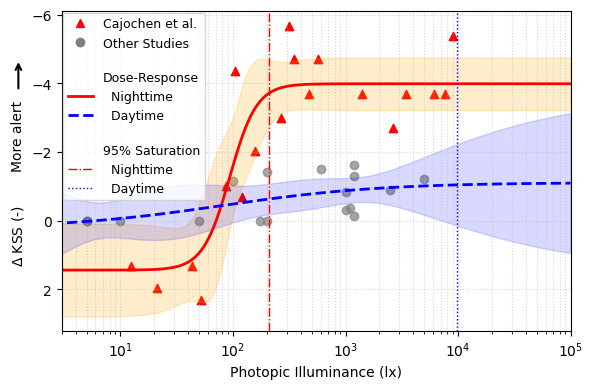

Fitted parameters Cajochen [a, b, c, d]: [ 1.44554492 93.6398758   3.64618471 -3.98507885]
Fitted parameters Other [a, b, c, d]: [ 0.23136977 80.7555492   0.61349576 -1.10583298]
Cajochen: half-saturation at 93.64 lux, 95% saturation at 209.98 lux
Other: half-saturation at 80.76 lux, 95% saturation at 9807.19 lux


In [118]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

# Load data
data = pd.read_excel("~/downloads/mean-subj-alertness.xlsx", sheet_name=0)
is_cajochen = data["Reference"] == "Cajochen et al. 2000"
x_all = data["illuminance_lux"].values
y_all = data["delta_kss"].values
x_caj = data.loc[is_cajochen, "illuminance_lux"].values
y_caj = data.loc[is_cajochen, "delta_kss"].values
not_cajochen = ~is_cajochen
x_other = data.loc[not_cajochen, "illuminance_lux"].values
y_other = data.loc[not_cajochen, "delta_kss"].values

max_x = 100000

def log_func(x, a, b, c, d):
    return (a - d) / (1 + (x / b) ** c) + d

# Fit for Cajochen
p0_caj = [max(y_caj), np.median(x_caj), 1, min(y_caj)]
params_caj, cov_caj = curve_fit(log_func, x_caj, y_caj, p0=p0_caj, maxfev=10000)

# Fit for all points except Cajochen
p0_other = [max(y_other), np.median(x_other), 1, min(y_other)]
params_other, cov_other = curve_fit(log_func, x_other, y_other, p0=p0_other, maxfev=10000)

# Confidence interval calculation
def conf_interval(x_fit, params, cov):
    # Jacobian matrix
    J = np.zeros((len(x_fit), len(params)))
    eps = np.sqrt(np.finfo(float).eps)
    for i in range(len(params)):
        p_eps = np.array(params)
        p_eps[i] += eps
        J[:, i] = (log_func(x_fit, *p_eps) - log_func(x_fit, *params)) / eps
    var_pred = np.sum(J @ cov * J, axis=1)
    sigma = np.sqrt(var_pred)
    return sigma

def saturation_x(params, p):
    a, b, c, d = params
    y_p = d + p * (a - d)
    val = (a - d) / (y_p - d) - 1
    if val <= 0:
        return np.nan
    return b * val**(1/c)

x_fit = np.logspace(np.log10(x_all.min()), np.log10(max_x), 200)
y_fit_caj = log_func(x_fit, *params_caj)
y_fit_other = log_func(x_fit, *params_other)
ci_caj = conf_interval(x_fit, params_caj, cov_caj)
ci_other = conf_interval(x_fit, params_other, cov_other)

plt.figure(figsize=(6, 4))
plt.scatter(x_caj, y_caj, color="red", label="Cajochen 2000", marker="^")  
plt.scatter(x_other, y_other, color="gray", alpha=0.7, label="Others", marker="o")  

plt.plot(x_fit, y_fit_caj, color="red", linewidth=2, label="Sigmoid (Cajochen)")
plt.fill_between(x_fit, y_fit_caj - 1.96 * ci_caj, y_fit_caj + 1.96 * ci_caj, color="orange", alpha=0.2)

plt.plot(x_fit, y_fit_other, color="blue", linewidth=2, linestyle="--", label="Sigmoid (Others)")
plt.fill_between(x_fit, y_fit_other - 1.96 * ci_other, y_fit_other + 1.96 * ci_other, color="blue", alpha=0.15)


# Cajochen
x_half_caj = saturation_x(params_caj, 0.5)
x_95_caj = saturation_x(params_caj, 0.05)
# plt.axvline(x_half_caj, color="orange", linestyle=":", linewidth=2, label="Cajochen 50%")
plt.axvline(x_95_caj, color="red", linestyle="-.", linewidth=1, label="95% saturation (Cajochen)")

# Others
x_half_other = saturation_x(params_other, 0.5)
x_95_other = saturation_x(params_other, 0.05)
# plt.axvline(x_half_other, color="blue", linestyle=":", linewidth=2, label="Others 50%")
plt.axvline(x_95_other, color="blue", linestyle=":", linewidth=1, label="95% saturation (Others)")

import matplotlib.lines as mlines
caj_points = mlines.Line2D([], [], color='red', marker='^', linestyle='None', label='Cajochen et al.')
oth_points = mlines.Line2D([], [], color='gray', marker='o', linestyle='None', label='Other Studies')
header_sigmoid = mlines.Line2D([], [], color='none', label='\nDose-Response', marker='None')
caj_sigmoid = mlines.Line2D([], [], color='red', linewidth=2, label='  Nighttime')
oth_sigmoid = mlines.Line2D([], [], color='blue', linestyle='--', linewidth=2, label='  Daytime')
header_saturation = mlines.Line2D([], [], color='none', label='\n95% Saturation', marker='None')
caj_95 = mlines.Line2D([], [], color='red', linestyle='-.', linewidth=1, label='  Nighttime')
oth_95 = mlines.Line2D([], [], color='blue', linestyle=':', linewidth=1, label='  Daytime')

plt.xlim(3,max_x)
plt.xscale("log")
plt.xlabel("Photopic Illuminance (lx)", fontsize=10)
plt.ylabel(r'$\Delta$ KSS (-)', fontsize=10)
plt.legend(
    handles=[
        caj_points, oth_points,
        header_sigmoid, caj_sigmoid, oth_sigmoid,
        header_saturation, caj_95, oth_95
    ],
    fontsize=9,
    loc='upper left',
    # bbox_to_anchor=(0, 1), 
    borderaxespad=0.1
)
plt.grid(True, which="both", ls=":", alpha=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_label_coords(-0.07, 0.3)
# Add "more alert" with a vertical arrow pointing up, above ΔKSS label, rotated to match ylabel
ax = plt.gca()
# First annotation: the text, rotated to match ylabel
ax.annotate(
    "More alert",
    xy=(-0.085, 0.5),
    xycoords=('axes fraction', 'axes fraction'),
    textcoords=('axes fraction', 'axes fraction'),
    ha='center', va='bottom', fontsize=10, rotation=90
)
# Second annotation: the arrow only, from just above the y-axis to above the label
ax.annotate(
    "",
    xy=(-0.085, 0.85), xytext=(-0.085, 0.75),
    xycoords=('axes fraction', 'axes fraction'),
    textcoords=('axes fraction', 'axes fraction'),
    arrowprops=dict(arrowstyle='->', color='black', lw=1.5)
)
plt.tight_layout()
plt.show()

print("Fitted parameters Cajochen [a, b, c, d]:", params_caj)
print("Fitted parameters Other [a, b, c, d]:", params_other)

for label, params in [("Cajochen", params_caj), ("Other", params_other)]:
    x_half = saturation_x(params, 0.5)
    x_95 = saturation_x(params, 0.05)
    print(f"{label}: half-saturation at {x_half:.2f} lux, 95% saturation at {x_95:.2f} lux")
